In [1]:
import tensorflow as tf
import os, sys
import numpy as np
from matplotlib import pyplot as plt
layers = tf.contrib.layers

In [2]:
data_generator = os.environ['DATA_GENERATOR']
sys.path.append(data_generator)
import get_data
from visualization import Visualizer

In [3]:
# images, labels = get_data.data_pipeline('mnist', 128, 'train')
# sess = tf.Session()
# x = sess.run(images)
# print(x.shape)
# print(x[1])

In [4]:
class AE():
    def __init__(self):
        self.graph = tf.Graph()
        self.batch_size = 128
        with self.graph.as_default():
            with tf.device('/cpu:0'):
                self.images, labels = get_data.data_pipeline('mnist', 128, 'train')
            self.visualizer = Visualizer(exp_name='AE_mnist', row=8, col=8)
            self.generated_images = self._build_graph(self.images, 5, reuse=tf.AUTO_REUSE, training=True)
            self.loss = self._loss_function(self.images, self.generated_images)
            self.solver = tf.train.AdamOptimizer(learning_rate=0.0001) \
                           .minimize(self.loss)
            initializer = tf.global_variables_initializer()
            self.sess = tf.Session()
            self.sess.run(initializer)
    def train(self, iteration):
        for i in range(iteration+1):
            loss, _, np_real_images, np_generated_images = self.sess.run(
                    [self.loss, self.solver, self.images, self.generated_images])
            if i % 10 == 0:
                print("iterator {} : loss {} ".format(i, loss))
            if i % 1000 == 0:
                self.visualize(np_real_images, np_generated_images, i)
            
    def visualize(self, images, generated_images, i):
        visual_imgs = np.concatenate( (images[:8*4], generated_images[:8*4]), axis = 0 )
        visual_imgs = 255*(visual_imgs/2 + 0.5)
        visual_imgs = visual_imgs.astype(int)
        self.visualizer.draw_imgs(visual_imgs)
        self.visualizer.save_fig(name="AE_mnist_iter_{}".format(str(i)))
        
    def _build_graph(self, input, dim_code, reuse=tf.AUTO_REUSE, training=False):
        regularizer = tf.contrib.layers.l2_regularizer(scale=0.01)
        net = layers.conv2d(input, 64, (3,3), 1, weights_regularizer=regularizer)
        net = layers.conv2d(net, 32, (3,3), 2, weights_regularizer=regularizer)
        net = layers.conv2d(net, 32, (3,3), 2, weights_regularizer=regularizer)
        net = layers.flatten(net)
        net = layers.fully_connected(net, 128, weights_regularizer=regularizer)
        latent_var = layers.fully_connected(net, dim_code, weights_regularizer=regularizer)
        
        net = layers.fully_connected(latent_var, 128, weights_regularizer=regularizer)
        net = layers.fully_connected(latent_var, 7*7*32, weights_regularizer=regularizer)
        net = tf.reshape(shape=[-1, 7, 7, 32], tensor=net)
        net = layers.conv2d_transpose(net, 32, (3,3), 1, weights_regularizer=regularizer)
        net = layers.conv2d_transpose(net, 32, (3,3), 2, weights_regularizer=regularizer)
        net = layers.conv2d_transpose(net, 64, (3,3), 2, weights_regularizer=regularizer)
        net = layers.conv2d_transpose(net, 1, (3,3), 1, activation_fn=tf.nn.tanh, weights_regularizer=regularizer)
        return net
    def _loss_function(self, _real_images, _generated_images):
        recon_loss = tf.reduce_mean(tf.square(_real_images - _generated_images))
        return recon_loss

(?, 28, 28, 1)


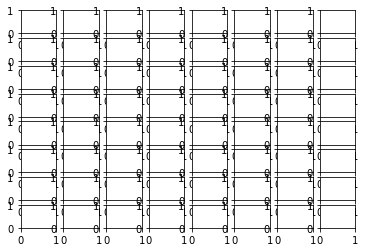

In [5]:
x = AE()

In [6]:
x.train(iteration=10000)

iterator 0 : loss 0.9057450294494629 
iterator 10 : loss 0.8897145390510559 
iterator 20 : loss 0.8583968877792358 
iterator 30 : loss 0.7694113850593567 
iterator 40 : loss 0.5553624629974365 
iterator 50 : loss 0.3581501841545105 
iterator 60 : loss 0.3188525140285492 
iterator 70 : loss 0.3023625612258911 
iterator 80 : loss 0.3411181569099426 
iterator 90 : loss 0.33557844161987305 
iterator 100 : loss 0.3709307312965393 
iterator 110 : loss 0.3373946249485016 
iterator 120 : loss 0.2920726537704468 
iterator 130 : loss 0.3214159309864044 
iterator 140 : loss 0.2908421456813812 
iterator 150 : loss 0.335613876581192 
iterator 160 : loss 0.3363533020019531 
iterator 170 : loss 0.3296518921852112 
iterator 180 : loss 0.3415021598339081 
iterator 190 : loss 0.3214062452316284 
iterator 200 : loss 0.3043321967124939 
iterator 210 : loss 0.3417326509952545 
iterator 220 : loss 0.36054736375808716 
iterator 230 : loss 0.26960763335227966 
iterator 240 : loss 0.22728335857391357 
iterator

iterator 2000 : loss 0.09822224825620651 
iterator 2010 : loss 0.10762204974889755 
iterator 2020 : loss 0.09526433795690536 
iterator 2030 : loss 0.11021547019481659 
iterator 2040 : loss 0.109731525182724 
iterator 2050 : loss 0.10872303694486618 
iterator 2060 : loss 0.09955958276987076 
iterator 2070 : loss 0.10014385730028152 
iterator 2080 : loss 0.1015157699584961 
iterator 2090 : loss 0.10411449521780014 
iterator 2100 : loss 0.10731969773769379 
iterator 2110 : loss 0.10357426851987839 
iterator 2120 : loss 0.10235095769166946 
iterator 2130 : loss 0.10798228532075882 
iterator 2140 : loss 0.09679704904556274 
iterator 2150 : loss 0.0955444723367691 
iterator 2160 : loss 0.10341241210699081 
iterator 2170 : loss 0.10686622560024261 
iterator 2180 : loss 0.09081653505563736 
iterator 2190 : loss 0.10846009850502014 
iterator 2200 : loss 0.09979763627052307 
iterator 2210 : loss 0.09817874431610107 
iterator 2220 : loss 0.10004978626966476 
iterator 2230 : loss 0.103388808667659

iterator 3970 : loss 0.09400796890258789 
iterator 3980 : loss 0.0960390493273735 
iterator 3990 : loss 0.09253762662410736 
iterator 4000 : loss 0.10059811919927597 
iterator 4010 : loss 0.09459757059812546 
iterator 4020 : loss 0.0909419134259224 
iterator 4030 : loss 0.09530682116746902 
iterator 4040 : loss 0.0891919806599617 
iterator 4050 : loss 0.09285463392734528 
iterator 4060 : loss 0.09043829143047333 
iterator 4070 : loss 0.09552288055419922 
iterator 4080 : loss 0.10282059013843536 
iterator 4090 : loss 0.08965037018060684 
iterator 4100 : loss 0.0867980420589447 
iterator 4110 : loss 0.09440290927886963 
iterator 4120 : loss 0.09634608030319214 
iterator 4130 : loss 0.09889505058526993 
iterator 4140 : loss 0.09276711195707321 
iterator 4150 : loss 0.09282416105270386 
iterator 4160 : loss 0.08880255371332169 
iterator 4170 : loss 0.08324222266674042 
iterator 4180 : loss 0.08974885195493698 
iterator 4190 : loss 0.09635914862155914 
iterator 4200 : loss 0.087583772838115

iterator 5940 : loss 0.08131643384695053 
iterator 5950 : loss 0.08225519955158234 
iterator 5960 : loss 0.08295846730470657 
iterator 5970 : loss 0.08024721592664719 
iterator 5980 : loss 0.07843803614377975 
iterator 5990 : loss 0.08640207350254059 
iterator 6000 : loss 0.09381627291440964 
iterator 6010 : loss 0.08962158113718033 
iterator 6020 : loss 0.08812065422534943 
iterator 6030 : loss 0.08657073229551315 
iterator 6040 : loss 0.08718080073595047 
iterator 6050 : loss 0.08955357223749161 
iterator 6060 : loss 0.08221939951181412 
iterator 6070 : loss 0.08446462452411652 
iterator 6080 : loss 0.07824325561523438 
iterator 6090 : loss 0.0818307027220726 
iterator 6100 : loss 0.08430317789316177 
iterator 6110 : loss 0.07670216262340546 
iterator 6120 : loss 0.09068098664283752 
iterator 6130 : loss 0.08207204192876816 
iterator 6140 : loss 0.08048445731401443 
iterator 6150 : loss 0.08245833218097687 
iterator 6160 : loss 0.08351049572229385 
iterator 6170 : loss 0.083753392100

iterator 7910 : loss 0.07808949053287506 
iterator 7920 : loss 0.07094507664442062 
iterator 7930 : loss 0.07812303304672241 
iterator 7940 : loss 0.08120867609977722 
iterator 7950 : loss 0.07044022530317307 
iterator 7960 : loss 0.08043450862169266 
iterator 7970 : loss 0.07981852442026138 
iterator 7980 : loss 0.08189874142408371 
iterator 7990 : loss 0.08093510568141937 
iterator 8000 : loss 0.07505544275045395 
iterator 8010 : loss 0.08113029599189758 
iterator 8020 : loss 0.07845116406679153 
iterator 8030 : loss 0.08267336338758469 
iterator 8040 : loss 0.08321713656187057 
iterator 8050 : loss 0.08169294148683548 
iterator 8060 : loss 0.07973244786262512 
iterator 8070 : loss 0.08285998553037643 
iterator 8080 : loss 0.08732790499925613 
iterator 8090 : loss 0.08081863820552826 
iterator 8100 : loss 0.08466799557209015 
iterator 8110 : loss 0.08258912712335587 
iterator 8120 : loss 0.08070957660675049 
iterator 8130 : loss 0.07780708372592926 
iterator 8140 : loss 0.08289103955

iterator 9880 : loss 0.08197402209043503 
iterator 9890 : loss 0.07309142500162125 
iterator 9900 : loss 0.07865685224533081 
iterator 9910 : loss 0.08561041206121445 
iterator 9920 : loss 0.07856013625860214 
iterator 9930 : loss 0.07121706753969193 
iterator 9940 : loss 0.08278369158506393 
iterator 9950 : loss 0.07584425806999207 
iterator 9960 : loss 0.07856997847557068 
iterator 9970 : loss 0.07673565298318863 
iterator 9980 : loss 0.08443818986415863 
iterator 9990 : loss 0.08054713904857635 
iterator 10000 : loss 0.08277828991413116 
